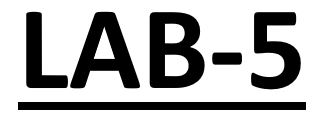

# **Importing Some Basic Libraries**

In [9]:
import nltk
from collections import defaultdict
import pprint
import random
import numpy as np

In [10]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Importing Data**

In [12]:
from nltk.corpus import movie_reviews

In [13]:
movie_review_sents = movie_reviews.sents()

# **Building a Trigram Model**

In [14]:
from nltk import trigrams

In [15]:
# Creating placeholder for Trigram model
trigram_model = defaultdict(lambda: defaultdict(lambda: 0))

In [16]:
# Count frequency
for s in movie_review_sents:
    for a, b, c in trigrams(s, pad_right=True, pad_left=True):
        trigram_model[(a, b)][c] += 1
 
# probabilities
for a_b in trigram_model:
    Totalcount = float(sum(trigram_model[a_b].values()))
    for c in trigram_model[a_b]:
        trigram_model[a_b][c] /= Totalcount

In [17]:
dict(trigram_model["sound", "is"])   # Checking is Trigram Model works properly

{'all': 0.25,
 'coming': 0.125,
 'muted': 0.125,
 'only': 0.125,
 'particularly': 0.125,
 'pretty': 0.125,
 'terrible': 0.125}

# **Building a Bigram Model**

In [18]:
from nltk import bigrams

In [19]:
# Create a placeholder for Bigram model
bigram_model = defaultdict(lambda: defaultdict(lambda: 0))

In [20]:
# Count frequency 
for s in movie_review_sents:
    for a, b in bigrams(s, pad_right=True, pad_left=True):
        bigram_model[a][b] += 1
 
# probabilities
for a in bigram_model:
    Totalcount = float(sum(bigram_model[a].values()))
    for b in bigram_model[a]:
        bigram_model[a][b] /= Totalcount

In [21]:
dict(bigram_model["awesome"])  # Checking is Bigram Model works properly

{'!': 0.05714285714285714,
 ',': 0.17142857142857143,
 '.': 0.2,
 'as': 0.02857142857142857,
 'events': 0.02857142857142857,
 'evil': 0.02857142857142857,
 'images': 0.02857142857142857,
 'in': 0.02857142857142857,
 'installment': 0.02857142857142857,
 'memory': 0.02857142857142857,
 'moment': 0.02857142857142857,
 'portrayal': 0.02857142857142857,
 'power': 0.02857142857142857,
 'responsibility': 0.02857142857142857,
 'science': 0.02857142857142857,
 'series': 0.02857142857142857,
 'sight': 0.02857142857142857,
 'sound': 0.02857142857142857,
 'soundtrack': 0.02857142857142857,
 'special': 0.02857142857142857,
 'spectacle': 0.02857142857142857,
 'talent': 0.02857142857142857,
 'villain': 0.02857142857142857}

# **Generating Random Text Using Bigram Model**

In [22]:
end_punctuation     = set(['.','!','?'])
middle_punctuation  = set([',',';',':'])
open_brace          = set(['(','['])
close_brace         = set([')',']'])
remainers           = set(["'",'"'])
rem                 = set(["s","t"])

In [23]:
def smartJoin(word_list):    
    sentence_start_index = 1 if word_list[0] == '<START>' else 0
    sentence_string      = word_list[sentence_start_index]
    
    for i in range(sentence_start_index+1,len(word_list)):
        
        use_space    = True
        current_word = word_list[i]
        prev_word    = word_list[i-1] 

        if current_word in remainers and prev_word.isalpha(): #Contractions- do and n't would have a space in between by default. Removing it.
            use_space = False
            
        elif current_word in middle_punctuation: #Comma/Colon/Semicolon- there should be no space between a word and a comma
            use_space = False

        elif current_word in rem: #remove space before "s" and "t"
            use_space = False

        elif current_word in end_punctuation: #Sentence ending
            use_space = False
            
        elif current_word == "''" and (prev_word in end_punctuation or prev_word in middle_punctuation): # Quote ending
            use_space = False
            
        elif prev_word == "``" and current_word.isalpha(): # Quote starting
            use_space = False
            
        elif prev_word in open_brace: # Open brace
            use_space = False
            
        elif current_word in close_brace: # Close brace
            use_space = False

        sentence_string += current_word if not use_space else ' ' + current_word

    return sentence_string

In [24]:
 no_of_sentences = 15
 for i in range(no_of_sentences):
     s = random.choice(movie_review_sents)
     string = [s[0]]
     while string[-1] not in end_punctuation:
          rdm = random.random()
          a = .0

          for w in bigram_model[string[-1]].keys():
              a += bigram_model[string[-1]][w]
              if a >= rdm:      
                  string.append(w)
                  break
     print(smartJoin(string))

.
even if he eyes and" " dead - your real humor is because his family wants me ask to empire' ve seen a couple ii - star film had just kill someone's leaving the book style b" the president eric (miriam healy - out teen children, his rugged and a f.
what won's another, there's engaging use the lemmon).
take - packed and original dumb, he' blabbed about war.
there are never deal more about the film repeats it was for dream" go a sexual assault after only two.
including the reasons.
there are wholesome sweetness, but it for some psychological obstacles, but the grant to one where the stampede is a frivolous lawsuit as departure points of the medicine would have what do good as the ants.
his exploitation.
the revolutionary propulsion system a reference to endure as marcy, and now we do food he gets off hours of the event that focuses on a funny summing up.
a well.
we have invested in her decision.
one particular rhetoric is contrived and they pull off and this -- earth through the bronx, 

# **Limitations of N-gram Language Model:**

### **First One:**

It'll provide zero chance to any or all the words that don't seem to be present within the training corpus. Because we tend to build the model supported the chances of words co-occuring. It is the distributed illustration of language.<br>
We ensure that none of the possible bigrams have zero probability by using **smoothing**. It is the process of spreading the probability mass around to all possible bigrams.

### **Second One:**

Basically, the model is better if N value is high as it helps to predicting next word more accurately.<br>For Example:<br> In Bigram Model, we only see last word to predict next word.

*   In Bigram Model, we only see last word to predict next word.
*   On the other hand,<br> In Trigram Model, we see last two words to predict next word.

Which results in more accurate results.<br>
But this will Results in more computation Cost. 

# **Implementation of a GPT-2 Algorithm**

**aitextgen**

A strong tool for advanced AI text generation via GPT-2.

aitextgen could be a Python package that leverages PyTorch, Huggingface Transformers and pytorch-lightning with specific optimizations for text generation exploitation GPT-2, plus many added options. it's the successor to textgenrnn and gpt-2-simple, taking the simplest of each packages:

*   Generates text quicker than gpt-2-simple and with higher memory efficiency! (even from the one.5B GPT-2 model!)
*   With Transformers, aitextgen preserves compatibility with the bottom package, permitting you to use the model for alternative IP tasks, transfer custom GPT-2 models from the Huggingface model repository, and transfer your own models! additionally, it uses the included generate() function to permit a vast quantity of management over the generated text.
*   With pytorch-lightning, aitextgen trains models not simply on CPUs and GPUs, however additionally multiple GPUs and (eventually) TPUs! It also includes a reasonably coaching progress bar, with the power to feature nonmandatory loggers.


In [25]:
!pip install transformers==2.9.1
!pip install pytorch-lightning==0.7.6
!pip install -q aitextgen

     |████████████████████████████████| 645kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 13.9MB/s 
     |████████████████████████████████| 890kB 18.8MB/s 
     |████████████████████████████████| 3.8MB 15.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=56a2d02fe06de3f4930d2a3691cb03a7ef94799420deb6ef6b96089133c23fc2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 829kB 8.1MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=157b9e11d166dbfb997b1ca87f7fee4bf7781475a701f3592d50490d813bdcd0
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      

In [26]:
from aitextgen import aitextgen
from aitextgen.TokenDataset import TokenDataset
from aitextgen.utils import build_gpt2_config
from aitextgen.tokenizers import train_tokenizer
from aitextgen.utils import GPT2ConfigCPU

In [34]:
file = "movieReviews.txt"

In [36]:
train_tokenizer(file)
vocab_file = "aitextgen-vocab.json"
merges_file = "aitextgen-merges.txt"

# GPT2ConfigCPU is a mini variant of GPT-2 optimized for CPU-training
config = GPT2ConfigCPU()

# Instantiate aitextgen using the created tokenizer and config
ai = aitextgen(vocab_file=vocab_file, merges_file=merges_file, config=config)

# It automatically processes the dataset with the appropriate size.
data = TokenDataset(file, vocab_file=vocab_file, merges_file=merges_file, block_size=64)

# Training Model
ai.train(data, batch_size=16, num_steps=5000)

# Generate text from it!
ai.generate(10, prompt="Happy:")

INFO:aitextgen.tokenizers:Saving aitextgen-vocab.json and aitextgen-merges.txt to the current directory. You will need both files to build the GPT2Tokenizer.
INFO:aitextgen:Constructing GPT-2 model from provided config.
INFO:aitextgen:Using a custom tokenizer.


INFO:aitextgen.TokenDataset:Encoding 8,529 sets of tokens from movieReviews.txt.
GPU available: False, used: False
INFO:lightning:GPU available: False, used: False
No environment variable for node rank defined. Set as 0.


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


1,000 steps reached: saving model to /trained_model
1,000 steps reached: generating sample texts.
.	
 But the film for its lot of this film	
 It's with a movie is are be the film, and the great film is one.	
 A movie.	
 A a movie, but but it not by the movie, the lot, a-p----stal of the first
2,000 steps reached: saving model to /trained_model
2,000 steps reached: generating sample texts.
ingly, but the film is more, but it that a characters that's a movie it's much.	
 The movie.	
 A movie.	
 The film's its film, and the way to be enough to be an a film.	
 It's it is a best to be this film
3,000 steps reached: saving model to /trained_model
3,000 steps reached: generating sample texts.
 a film, which can be a movie.	
 The Bala's not a best-the-year-of-soie Gin's a little film is not a film for the same.	
 Slick to the film's movie, but that we be a cast is more than
4,000 steps reached: saving model to /trained_model
4,000 steps reached: generating sample texts.
it the film.	
 A, and a

INFO:aitextgen:Saving trained model pytorch_model.bin to /trained_model


 up, if I 'll have been a few for a per, and the movie.	
 The story isn't just a good-of-fice of it's the time, but it's just not a much for all.	
 It's a film has a fascinating, but it
Happy: -LRB- and A -RRB- -RRB- and Lan -RRB- is not a film, but it's more interesting to its audience.	
 An unfviorable, the same time, at your same time, the film's most of the movie hasn't get too
Happy:s a story that's a hold with the movie, so much, it is a good more than an interesting, but it's a good drama that's not a fine movie that is not much of a movie.	
 A comedy.	
 But the viewer's not have in a
Happy: Lapor.	
 The way a few, but a lot of the way, and the big-nop-tun, which is not a way, but just doesn't have been a one.	
 A movie of the script as a compelling, but not be a movie.	
 W
Happy:ically, who are the film is an intriguing, and the film is a hading, and stow for a greatness.	
 It's not more like a film for a sense of the film.	
... with a little way with a film with a movie with a

**Generating Text**

In [43]:
ai.generate(n=20)

 in the best documentary.	
 Too compelling, but the movie is, and the kind of a few story.	
 The film is a movie that has a film, and even the film is a new.	
 A great, a movie is a few in the film has just one of a gester.	



In [44]:
ai.generate(n=100,batch_size=5,prompt="comedy:",temperature=1.0,top_p=0.9)

comedy: The movie's nothing in your own minutes.	
 -LRB- Care -RRB- and Tobge -RRB- -RRB- has a more than a good comedy.	
 Like a great film, is it has in a lot like a more than a very one-	
 The Pro
comedy: that doesn't take all of the end.	
 A fine, an entertaining look from its audience.	
 Ascamingly well, well as the film is that it is a more funny story and often as one of an unlands of all the cast, which is so much to be more
comedy: Mapa Ho's that's in the movie to be made a humbousness.	
 The film is funny in the story of the story of the screen.	
 An entertaining, and a one movie, but ultimately a very fimish in all at much of The problem by
comedy: But you're well well as it the screen in a pet, and the best film's not a film is about the best actors, and, one film's nothing more than that would be no matter of a little time with the own way.	
 Wino, it's
comedy: Waa's of the characters in that he might haven't know it made this film, and a way, the screen story for a bow.	


# **Implementation of a Deep Learning Model**

In [103]:
import re
import random
from sklearn.model_selection import train_test_split

In [49]:
para_object = open('declaration.txt')
input_str = para_object.read()

In [50]:
input_str = input_str.lower()     # Making all letters lowercase in text.

In [51]:
input_str

"the unanimous declaration of the thirteen united states of america, when in the course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the laws of nature and of nature's god entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation.\n\nwe hold these truths to be self-evident, that all men are created equal, that they are endowed by their creator with certain unalienable rights, that among these are life, liberty and the pursuit of happiness.--that to secure these rights, governments are instituted among men, deriving their just powers from the consent of the governed, --that whenever any form of government becomes destructive of these ends, it is the right of the people to alter or to abolish it, and to institute new government, laying its foundat

In [54]:
def cleaner(text):
    newString = re.sub(r"'s\b","",text)
    newString = re.sub("[^a-zA-Z]", " ", newString)                              # remove punctuations
    long_words=[]
    for i in newString.split():                                                  # remove short word
        if len(i)>=2:                  
            long_words.append(i)
    return (" ".join(long_words)).strip()

In [55]:
new_data = cleaner(input_str)                                                   # preprocess the text

In [56]:
new_data

'the unanimous declaration of the thirteen united states of america when in the course of human events it becomes necessary for one people to dissolve the political bands which have connected them with another and to assume among the powers of the earth the separate and equal station to which the laws of nature and of nature god entitle them decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation we hold these truths to be self evident that all men are created equal that they are endowed by their creator with certain unalienable rights that among these are life liberty and the pursuit of happiness that to secure these rights governments are instituted among men deriving their just powers from the consent of the governed that whenever any form of government becomes destructive of these ends it is the right of the people to alter or to abolish it and to institute new government laying its foundation on such principles and 

In [57]:
def create_seq(text):
    l = 30
    s = list()
    for i in range(l, len(text)):
        seq = text[i-l:i+1]                                                     # sequence of tokens
        s.append(seq)                                                           # store
    print('Total Sequences: %d' % len(s))
    return s

In [68]:
sequences = create_seq(new_data)

Total Sequences: 7859


In [69]:
# Creating character mapping index
ch = sorted(list(set(new_data)))
mapping = dict((c, i) for i, c in enumerate(ch))

def encode_seq(seq):
    s = list()
    for line in seq:
        encoded_seq = [mapping[ch] for ch in line]                              # integer encode line
        s.append(encoded_seq)                                                   # store
    return s

In [70]:
# encode the sequences to make features
encoded_features = encode_seq(sequences)

In [99]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from pickle import dump
from keras.preprocessing.text import Tokenizer

In [73]:
vocab = len(mapping)                                                            # vocabulary size
features = np.array(encoded_features)

X, y = features[:,:-1], features[:,-1]                                          # create X and y

y = to_categorical(y, num_classes=vocab)                                        # encode y

In [74]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting data into 70% and 30% for training and validation  respectively.

In [86]:
# defining model
model = Sequential()
model.add(Embedding(vocab, 64, input_length=30, trainable=True))
model.add(layers.LSTM(128))
model.add(Dense(vocab, activation='relu'))
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 30, 64)            1728      
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 27)                3483      
Total params: 104,027
Trainable params: 104,027
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [88]:
model.fit(X_tr, y_tr, epochs=100, verbose=2, validation_data=(X_val, y_val))    # Train Model

Epoch 1/100
172/172 - 7s - loss: 5.0434 - acc: 0.1491 - val_loss: 4.7999 - val_acc: 0.1658
Epoch 2/100
172/172 - 7s - loss: 4.6069 - acc: 0.1676 - val_loss: 4.2164 - val_acc: 0.0818
Epoch 3/100
172/172 - 7s - loss: 3.9453 - acc: 0.1943 - val_loss: 3.8886 - val_acc: 0.1959
Epoch 4/100
172/172 - 6s - loss: 3.6167 - acc: 0.2285 - val_loss: 3.5487 - val_acc: 0.2358
Epoch 5/100
172/172 - 6s - loss: 3.4545 - acc: 0.2560 - val_loss: 3.6581 - val_acc: 0.0827
Epoch 6/100
172/172 - 6s - loss: 3.4267 - acc: 0.2205 - val_loss: 3.4856 - val_acc: 0.2795
Epoch 7/100
172/172 - 7s - loss: 3.4306 - acc: 0.2071 - val_loss: 3.5426 - val_acc: 0.2070
Epoch 8/100
172/172 - 7s - loss: 3.4353 - acc: 0.2236 - val_loss: 3.5752 - val_acc: 0.1853
Epoch 9/100
172/172 - 6s - loss: 3.4027 - acc: 0.2730 - val_loss: 3.4890 - val_acc: 0.2871
Epoch 10/100
172/172 - 6s - loss: 3.3449 - acc: 0.2761 - val_loss: 3.4859 - val_acc: 0.2765
Epoch 11/100
172/172 - 7s - loss: 3.3334 - acc: 0.2869 - val_loss: 3.4724 - val_acc: 0.26

In [101]:
# Saving the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [131]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):             # Generating a sequence from a language model
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)

**These files Created at the end for this lab.**

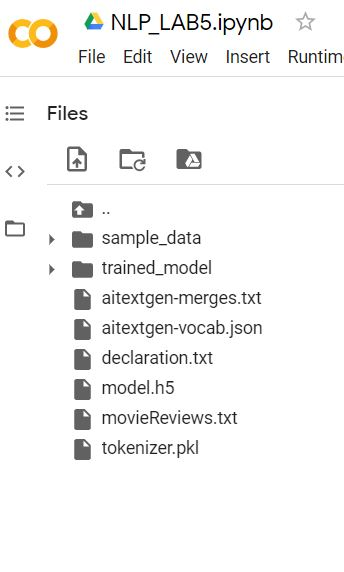